# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит домашнее задание - оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [2]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [3]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

Cloning into 'cv_course_2023'...
remote: Enumerating objects: 189, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 189 (delta 67), reused 147 (delta 26), pack-reused 0 (from 0)
Receiving objects: 100% (189/189), 25.85 MiB | 7.84 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [4]:
if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2025.git

Cloning into 'cv_course_2025'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 38 (delta 5), reused 37 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 10.64 MiB | 6.98 MiB/s, done.
Resolving deltas: 100% (5/5), done.


# 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [5]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

array([[[  5, 125, 144],
        [ 41, 128, 108],
        [ 21, 133, 123],
        ...,
        [ 21, 133, 121],
        [ 35, 139, 128],
        [  3,  90,  86]],

       [[  2, 148, 113],
        [242,  93,  37],
        [227,  90,  41],
        ...,
        [231, 115,  58],
        [242, 120,  68],
        [ 54,  62,  51]],

       [[ 21, 143, 149],
        [220,  95,  44],
        [190, 105,  55],
        ...,
        [197, 118,  77],
        [248, 130,  71],
        [ 36,  66,  55]],

       ...,

       [[  6, 145, 141],
        [ 15,  13,   2],
        [ 24,  41,  27],
        ...,
        [ 75, 151, 110],
        [100, 171, 128],
        [ 12,  66,  53]],

       [[ 24, 151, 149],
        [  6,  10,   0],
        [  0,  24,  11],
        ...,
        [100, 172, 129],
        [119, 184, 138],
        [ 35,  85,  67]],

       [[  3,  97, 102],
        [ 20,  41,  33],
        [ 12,  61,  53],
        ...,
        [  0,  48,  34],
        [ 13,  61,  43],
        [  0,  24,  35]]], dtype=uint8)
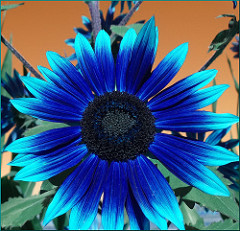

In [6]:
img

In [9]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

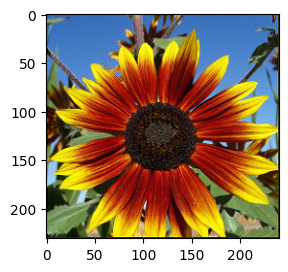

In [ ]:
plt.figure(figsize=[3, 3])
plt.imshow(img_rgb);

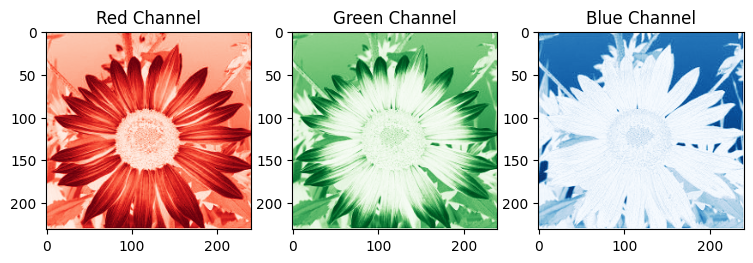

In [ ]:
plt.figure(figsize=[9, 3])

plt.subplot(131)
plt.imshow(img_rgb[:,:,0], cmap='Reds')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(img_rgb[:,:,1], cmap='Greens')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(img_rgb[:,:,2], cmap='Blues')
plt.title('Blue Channel')

plt.show()

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

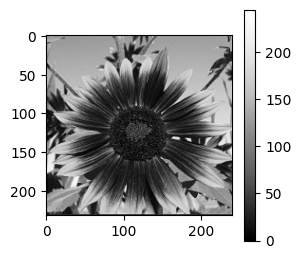

In [ ]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Можно ли получить черно-белое изображение из RGB представления путем вычисления среднего значения интенсивностей каналов R, G и B? Почему?

**Ответ:** Можно, т. к. цвета у пикселей будут одинаковые. Но это не лучший способ, т. к. разные цвета имеют разную длину волны и они имеют разные вклад в наше восприятие, поэтому есть формулы, которые для этого подходят лучше - н.р.https://mmuratarat.github.io/2020-05-13/rgb_to_grayscale_formulas - здесь

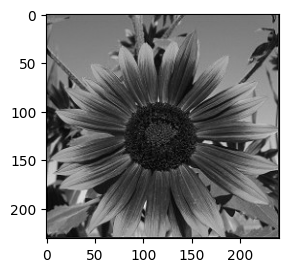

In [ ]:
img_gray = img_rgb.copy()
tmp = (np.sum(img_gray, axis=2)) // 3
img_gray[:, :, 0] = img_gray[:, :, 1] = img_gray[:, :, 2] = tmp
plt.figure(figsize=[3, 3])
plt.imshow(img_gray)

## Вопрос 2

Почему мы использовали флаг `cmap='Greys_r'` при отображении черно-белого изображения? Чем отличается от `cmap='Greys'`?

**Ответ:** r - reversed. Мне кажется, лучше cmap='gray' использовать

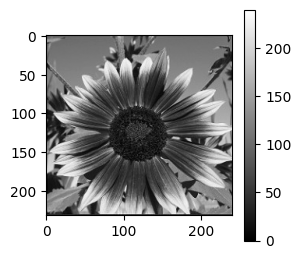

In [ ]:
plt.figure(figsize=[3, 3])
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.colorbar()
plt.show()

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [20]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

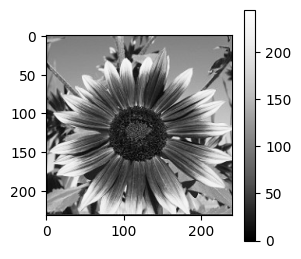

In [ ]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

серое изображение - двумерный массив:

In [ ]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB to gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [7]:
def convert_rgb_to_grayscale(img_rgb):
    return np.round(img_rgb[:, :, 0] * 0.299 + img_rgb[:, :, 1] * 0.587 + img_rgb[:, :, 2] * 0.114 + 0.001)

In [12]:
assert(np.sum(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) != convert_rgb_to_grayscale(img_rgb)) < 10)

на некоторых пикселях assert не проходит

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB to HSV

HSV - цветовое пространство, в котором цвет представлен тремя компонентами: Hue (оттенок), Saturation (насыщенность) и Value (значение). Это позволяет задавать цвета в более естественной форме, чем RGB.

In [13]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

можно попробовать отобразить изображение так же, как и RGB:

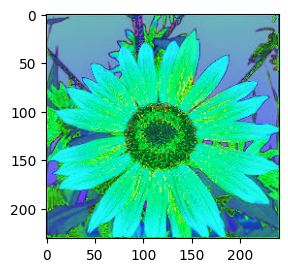

In [14]:
plt.figure(figsize=[3, 3])
plt.imshow(img_hsv);

Однако это не совсем корректно, так как Hue - это угол, а не интенсивность. Поэтому лучше отобразить оттенок в виде цвета, а насыщенность и значение - в виде яркости:

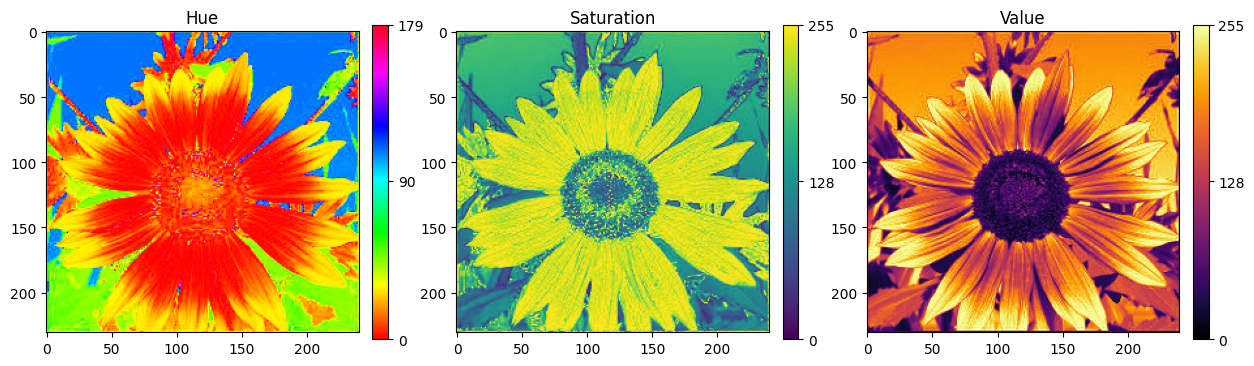

In [ ]:
h, s, v = cv2.split(img_hsv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('Hue')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(s, cmap="viridis")  # Using 'viridis' for Saturation
axs[1].set_title('Saturation')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="inferno")  # Using 'inferno' for Value
axs[2].set_title('Value')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

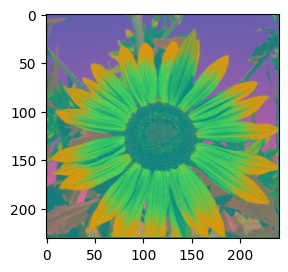

In [15]:
img_ycrcb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
plt.figure(figsize=[3, 3])
plt.imshow(img_ycrcb)

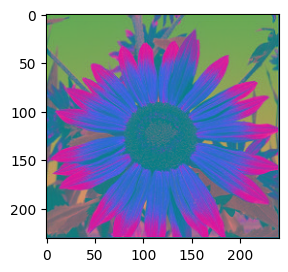

In [17]:
img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)
plt.figure(figsize=[3, 3])
plt.imshow(img_yuv)

## Вопрос 3

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:** В задачах, где нужна отдельная компонента, которой опредлеяется другое цветовое пространство. Н-р, HSV может быть полезна для определения объектов конкретного цвета, т. к. hue там идет отдельной компонентой

# 2. Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v]
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визуализировать гистограмму:

In [18]:
def visualize_hist(hist):
    plt.figure(figsize=[12, 3])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [21]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [22]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

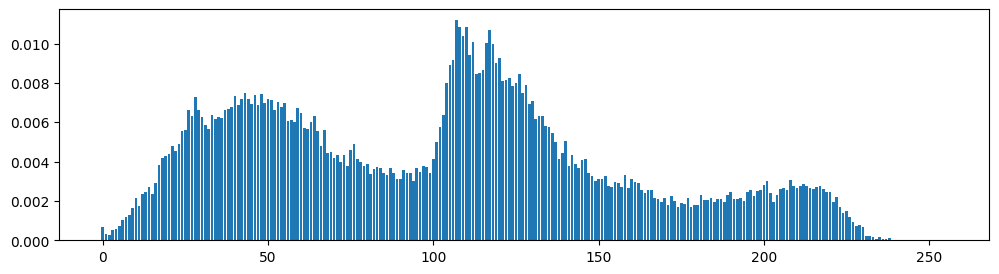

In [23]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [38]:
def compute_hist(img):
    unique, counts = np.unique(img, return_counts=True)

    img_hist = np.zeros(256)
    for uniq, cnt in zip(unique, counts):
      img_hist[uniq] = cnt
    return img_hist

In [44]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

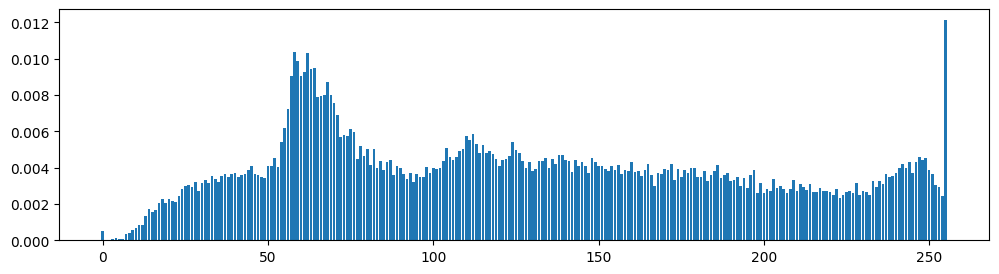

In [45]:
visualize_hist(hist_r)

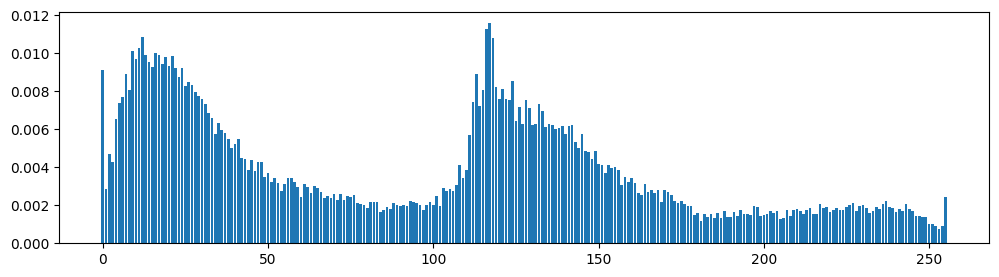

In [46]:
visualize_hist(hist_g)

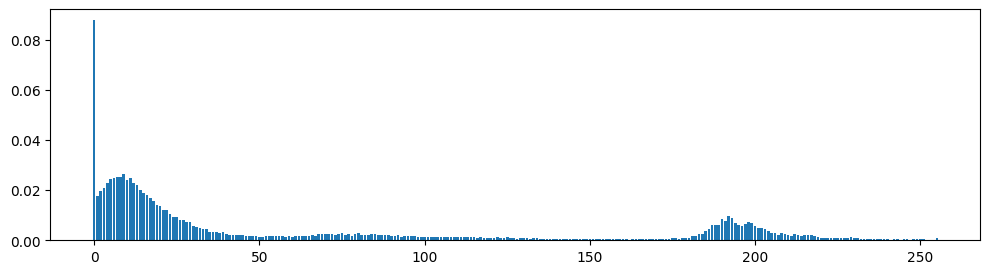

In [47]:
visualize_hist(hist_b)

In [40]:
assert((hist_gray == hist_cv).all())

## Вопрос 4

 Что можно сказать об изображении по его гистограмме?

**Ответ:** Синий канал довольно низкой интенсивности. У зеленого канала 2 пика: фон и цветок. Интенсивность красного у большинства пикселей > 50

## Вопрос 5

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени? Опишите несколько случаев: смена камеры, смена освещения, смена сцены.

**Ответ:**\
Смена освещения: примерно одинаково будет изменяться интенсивность каждого из каналов. \
Смена сцены: если сцена перешла с синих оттенков на зеленые, то значения у синих уменьшится, а у зеленых - увеличатся \
Смена камеры: если мы приблизили камеру к объекту одного цвета, то появится пик

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

In [62]:
_, enc_img_90 = cv2.imencode('.jpg', img_gray, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
_, enc_img_60 = cv2.imencode('.jpg', img_gray, [int(cv2.IMWRITE_JPEG_QUALITY), 60])
_, enc_img_30 = cv2.imencode('.jpg', img_gray, [int(cv2.IMWRITE_JPEG_QUALITY), 30])
_, enc_img_5 = cv2.imencode('.jpg', img_gray, [int(cv2.IMWRITE_JPEG_QUALITY), 5])

hist_90 = compute_hist(enc_img_90)
hist_60 = compute_hist(enc_img_60)
hist_30 = compute_hist(enc_img_30)
hist_5 = compute_hist(enc_img_5)

In [69]:
print(enc_img_90.shape, enc_img_60.shape, enc_img_30.shape, enc_img_5.shape)

(21304,) (10641,) (6716,) (2144,)


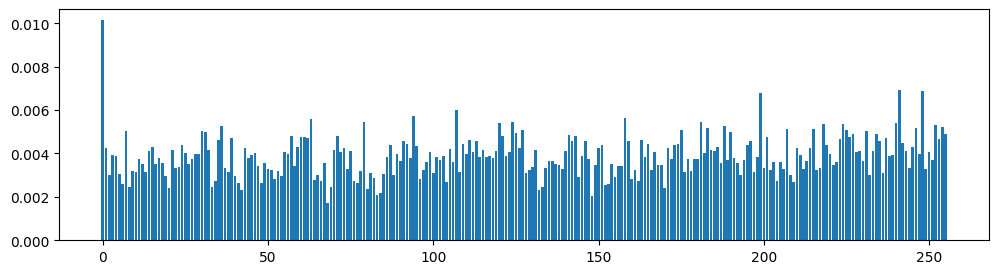

In [63]:
visualize_hist(hist_90)

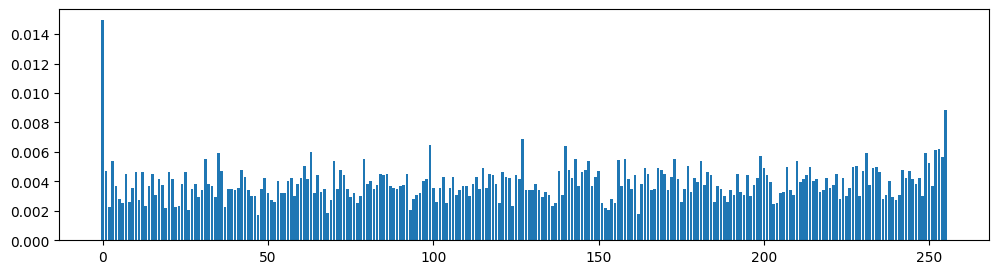

In [64]:
visualize_hist(hist_60)

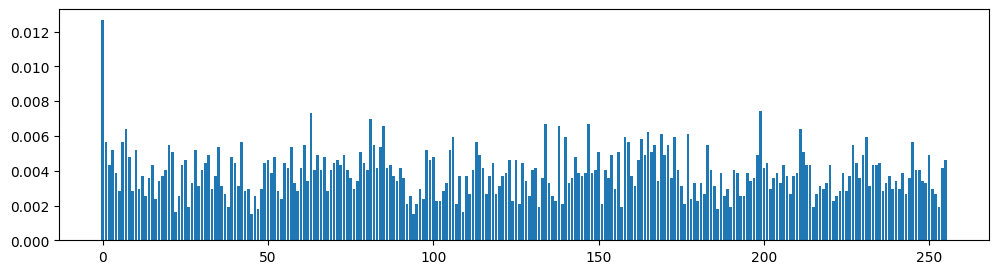

In [66]:
visualize_hist(hist_30)

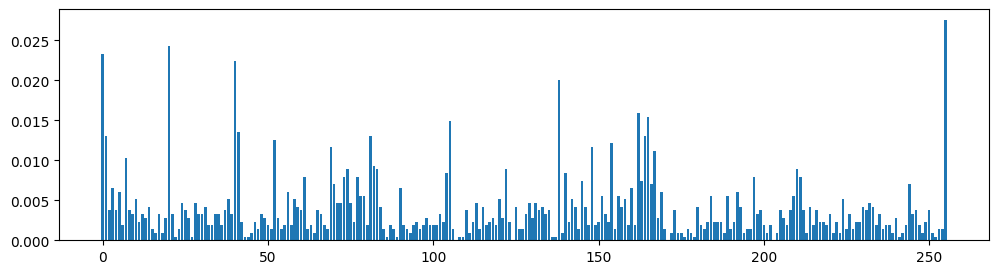

In [67]:
visualize_hist(hist_5)

Вывод: при 90 интенсивности распределены примерно равномерно. При усилении сжатия появляется много пиков, но сильного смещения влево или вправо нет

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

**Подсказка:** вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

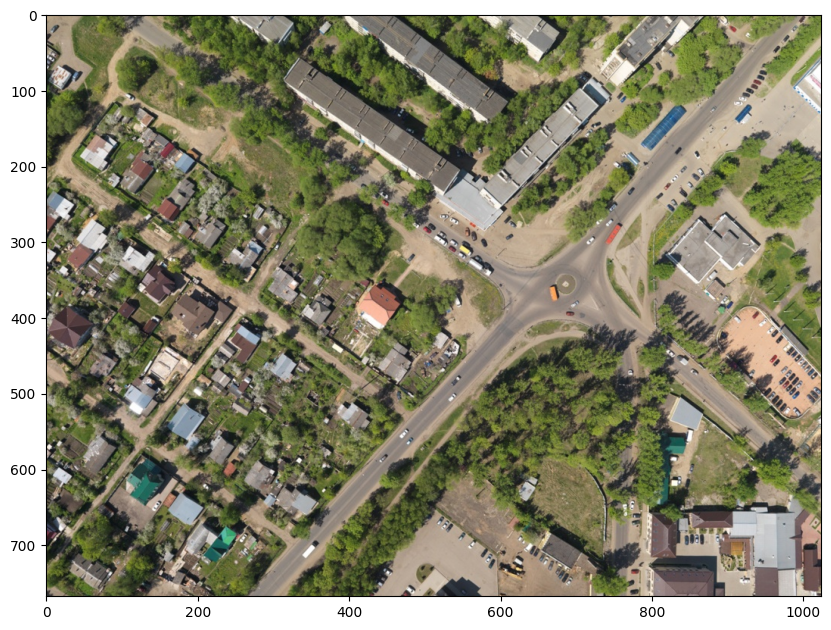

In [70]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image);

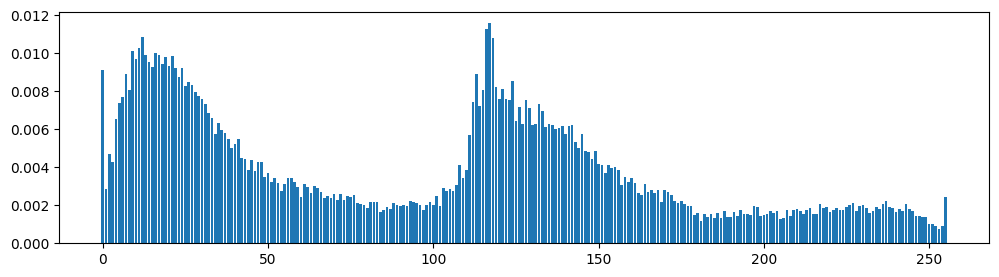

In [110]:
aerial_hist = compute_hist(img_rgb[:, :, 1])
visualize_hist(aerial_hist)

In [122]:
aerial_hsv = cv2.cvtColor(aerial_image, cv2.COLOR_RGB2HSV)
mask = (aerial_hsv[:, :, 0] > 25) & (aerial_hsv[:, :, 0] < 85) & (aerial_image[:, :, 1] > 10)

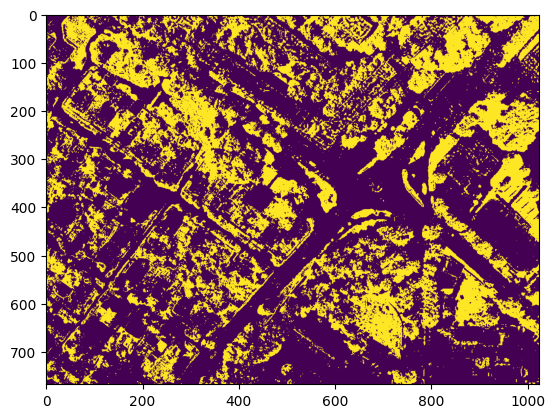

In [118]:
plt.imshow(mask)
plt.show()

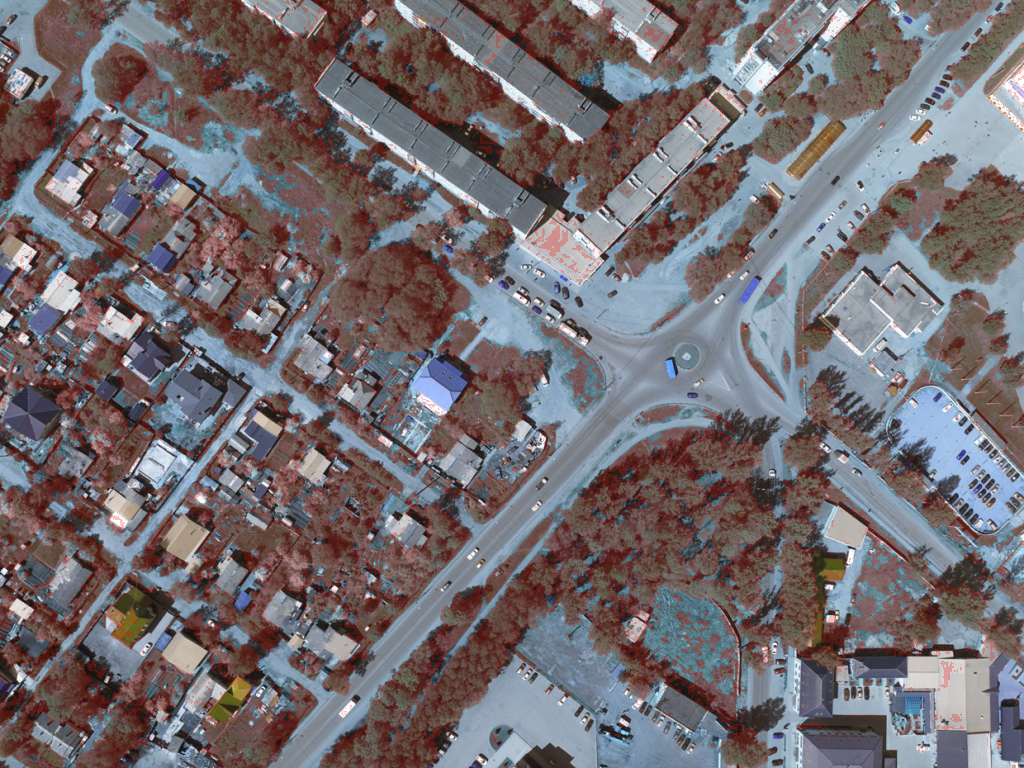

In [123]:
# https://inside-machinelearning.com/en/plot-segmentation-mask/
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def draw_mask(img, mask):
  # https://stackoverflow.com/questions/53477228/python-displaying-a-binary-array-as-image

  # color to fill
  color = np.array([0,0,255], dtype='uint8')

  # equal color where mask, else image
  # this would paint your object silhouette entirely with `color`
  masked_img = np.where(mask[...,None], color, img)

  # use `addWeighted` to blend the two images
  # the object will be tinted toward `color`
  intensity = 0.25
  return cv2.addWeighted(img, 1 - intensity, masked_img, intensity,0)


segmented_image = draw_mask(aerial_image, mask)

cv2_imshow(segmented_image)

Погрешность: в целом неплохо, иногда немного на крыши попадает \
Доля:

In [124]:
print(f"{round((np.sum(mask) / (mask.shape[0] * mask.shape[1])) * 100, 3)}%")

45.216%


# 3. Интегральные изображения

## Упражнение 6

Напомним, что интегральным изображением называется следующая функция:

$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$

С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [216]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img

        self.integral_value = np.zeros([img.shape[0] + 1, img.shape[1] + 1])

        # можно без for, н-р через модификации np.cumsum
        for i in range(1, img.shape[0] + 1):
          self.integral_value[i, 1] = self.integral_value[i - 1, 1] + img[i - 1, 0]
        for j in range(2, img.shape[1] + 1):
          self.integral_value[1, j] = self.integral_value[1, j - 1] + img[0, j - 1]
        for i in range(2, img.shape[0] + 1):
          for j in range(2, img.shape[1] + 1):
            self.integral_value[i, j] = img[i - 1, j - 1] + self.integral_value[i - 1, j] + self.integral_value[i, j - 1] - self.integral_value[i - 1, j - 1]

        print(self.integral_value)


    def sum(self, x, y, w, h):
        return self.integral_value[x + w, y + h] - self.integral_value[x, y + h] - self.integral_value[x + w, y] + self.integral_value[x, y]

In [217]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 6

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:** В задачах, где нужно быстро считать сумму интенсивностей, н-р для детекции объектов можно считать скользящим окном

## Вопрос 7

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:** динамическое программирование